### Примерный план (подстроить план под вашу задачу)
1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация
4. Генерация данных для обучения
5. Фильтрация данных
6. Создание модели
7. Проверка модели
8. Вывод

## 1. Цель и задачи исследования

Индивидуальный проект: Помощь в подборе фильмов

Автор: Бысов Федор Дмитриевич

Проверяющий: Савин Вадим Анатольевич

Ссылка на датасет: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset


**Задача**

- На основе рекомендаций пользователей, подобрать подходящий фильм на вечер.

## 2. Описание набора данных

Данные взяты из: 

[https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset](_____)


### Описание данных

Наборы данных описывают рейтинги от MovieLens, службы рекомендаций фильмов. Он содержит 20000263 рейтинга и 465564 тегов для 27278 фильмов. Эти данные были созданы 138493 пользователями в период с 9 января 1995 г. по 31 марта 2015 г. Этот набор данных был сгенерирован 17 октября 2016 г.
Пользователи были выбраны случайным образом для включения. Все выбранные пользователи оценили не менее 20 фильмов.

Датасет представлен в виде 6 файлов и представлены в виде таблицы: genome_scores.csv, genome_tags.csv, link.csv, movie.csv, tag.csv, rating.csv

Каждый пользователь представлен идентификатором, и никакая другая информация не предоставляется.

- tag.csv, который содержит теги, примененные к фильмам пользователями:

userId - уникальный номер пользователя


movieId - уникальный номер фильма


tag - слова котрые применяют при поиске фильма


timestamp - время

- rating.csv, который содержит оценки фильмов пользователями:

userId - уникальный номер пользователя


movieId - уникальный номер фильма


rating - оценка фильма


timestamp - время

- movie.csv, который содержит информацию о фильме:

movieId - уникальный номер фильма


title - название фильма


genres - жанр фильма

- link.csv, который содержит идентификаторы, которые можно использовать для ссылки на другие источники:

movieId - уникальный номер фильма


imdbId - индентификатор imb


tmbdId - индентификатор tmb

- genome_scores.csv, который содержит данные о релевантности тегов фильмов:

movieId - уникальный номер фильма


tagId - номер tag-а


relevance - актуальность

- genome_tags.csv, содержит описание тегов:

tagId - номер tag-а


tag - слова котрые применяют при поиске фильма


##  3. Разведочный анализ данных + визуализация



In [3]:
import os
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from tqdm import tqdm

In [4]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl

np.random.seed(123)

In [5]:
tag = pd.read_csv("../input/111111111/genome_scores.csv")
movies_1 = pd.read_csv("../input/111111111/movie.csv")
rating = pd.read_csv("../input/123123/rating2.csv")
link = pd.read_csv("../input/111111111/link.csv")
genome_tags = pd.read_csv("../input/111111111/genome_tags.csv")
genome_scores = pd.read_csv("../input/111111111/genome_scores.csv")

movies_2 = pd.read_csv(
    os.path.join("../input/111111111/movie.csv"),
    usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})

In [6]:
tag.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [36]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


In [8]:
movies_2.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
movies_1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
movies_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27256 entries, 0 to 27255
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             27256 non-null  int64  
 1   title               27256 non-null  object 
 2   year                27256 non-null  float64
 3   (no genres listed)  27256 non-null  bool   
 4   Action              27256 non-null  bool   
 5   Adventure           27256 non-null  bool   
 6   Animation           27256 non-null  bool   
 7   Children            27256 non-null  bool   
 8   Comedy              27256 non-null  bool   
 9   Crime               27256 non-null  bool   
 10  Documentary         27256 non-null  bool   
 11  Drama               27256 non-null  bool   
 12  Fantasy             27256 non-null  bool   
 13  Film-Noir           27256 non-null  bool   
 14  Horror              27256 non-null  bool   
 15  IMAX                27256 non-null  bool   
 16  Musi

In [10]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [41]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [11]:
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [43]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


In [12]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [44]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [13]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


Чтобы понять что находится в данных и сделать точную оценку, будет полезнее увидеть данные визуально.

В следующей визуализации дано соотношение данного рейтингового балла. Так как при создании модели планируется фильтрация по рейтингам, ориентироваться будем на их соотношение.

In [14]:
el = rating["rating"].value_counts().reset_index()
el.columns = ["rating", "percent"]
el["percent"] /= rating.shape[0]

fig = px.pie(el,
            names="rating",
            values="percent",
            title = "Rating Percent",
            width = 800,
            height=500
            )
fig.show()

Для нас также важно знать, сколько фильмов мы имеем в наших данных.

In [15]:
genres = movies_1["genres"].values
genres = [genre.split("|") for genre in genres]
genres_list = [item for sublist in genres for item in sublist]
uniq_genres = list(set(genres_list))

In [16]:
genres2count = {}
for item in uniq_genres:
    genres_count = genres_list.count(item)
    genres2count[item] = genres_count

In [17]:
df_genres2count = pd.DataFrame(genres2count.items(), columns=['genres', 'count'])

In [18]:
genres_values = df_genres2count.genres.values
count_values = df_genres2count["count"].values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



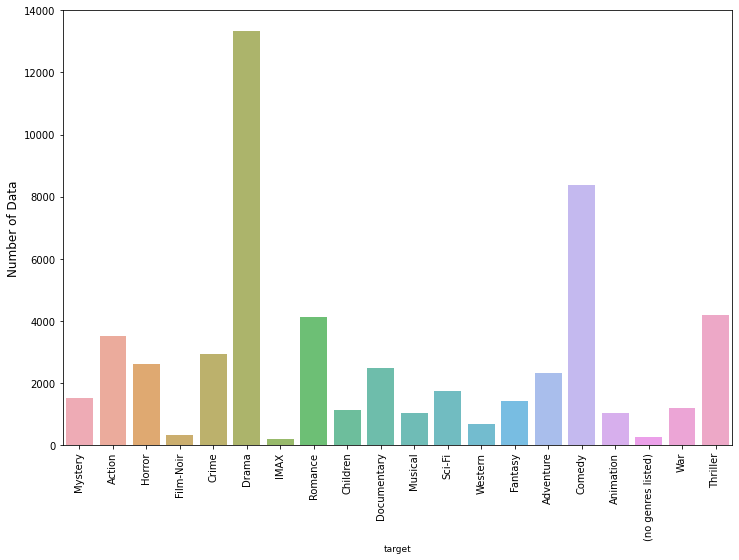

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(genres_values, count_values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

Так же визуально представим на сколько определенный жанр фильма был популярен в разные года.(Возможно нам понадобится эта информация)

In [20]:
movies_1['year'] = movies_1.title.str.extract("\((\d{4})\)", expand=True)
movies_1.year = pd.to_datetime(movies_1.year, format='%Y')
movies_1.year = movies_1.year.dt.year 
movies_1.title = movies_1.title.str[:-7]
genres_unique = pd.DataFrame(movies_1.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies_1 = movies_1.join(movies_1.genres.str.get_dummies().astype(bool))
movies_1.drop('genres', inplace=True, axis=1)
movies_1.dropna(inplace=True)
movies_1.sort_values(by='movieId', inplace=True)
movies_1.reset_index(inplace=True, drop=True)


<Figure size 720x360 with 0 Axes>

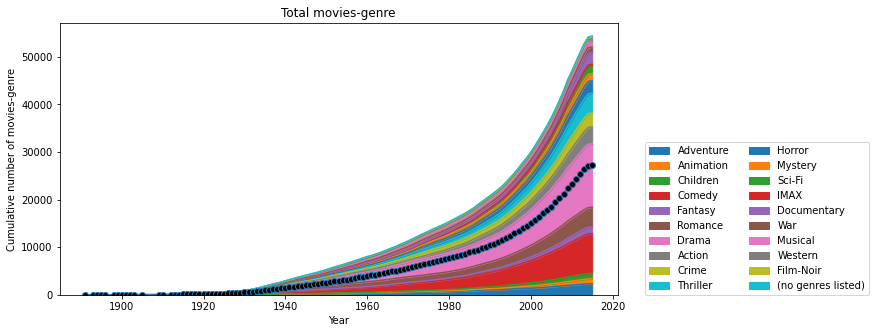

In [21]:
plt.figure(figsize=(10,5))


dftmp = movies_1[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})

for genre in genres_unique.genre:
    dftmp = movies_1[movies_1[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))

plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()


Визуализируем оценки фильмов поставленными пользователями

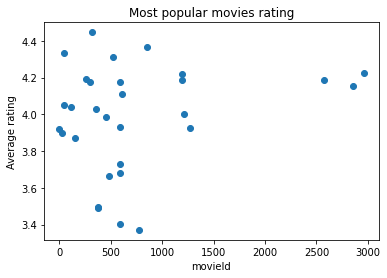

In [22]:
dftmp = rating[['userId', 'movieId']].groupby('movieId').count()
dftmp.columns=['num_ratings']
rating.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>40000]].groupby('movieId').mean().rating.plot(style='o')
plt.ylabel('Average rating')
plt.title('Most popular movies rating')
plt.show()

## 4. Генерация данных для обучения

Количество оценок который получил каждый фильм

In [23]:
movies_cnt = pd.DataFrame(rating.groupby('movieId').size(), columns=['count'])
movies_cnt.head()

,count
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


Теперь нам нужно брать только фильмы, которые были оценены не менее 50 раз, чтобы получить некоторое представление о реакции пользователей на них

In [24]:
popularity_thres = 50
popular_movies = list(set(movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = rating[rating.movieId.isin(popular_movies)]
print('shape of original ratings data: ', rating.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (20000263, 4)
shape of ratings data after dropping unpopular movies:  (19847947, 4)


Получить количество оценок, поставленных каждым пользователем

In [25]:
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,174
2,61
3,187
4,28
5,66


## 5. Фильтрация данных

Отфильтровать данные, чтобы приблизиться к предпочтениям пользователя.

In [26]:
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]
print('shape of original ratings data: ', rating.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (20000263, 4)
shape of ratings data after dropping both unpopular movies and inactive users:  (18181935, 4)


Создать матрицу пользователей фильмов

In [27]:
from scipy.sparse import csr_matrix

movie_user_mat = df_ratings_drop_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)

movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(movies_2.set_index('movieId').loc[movie_user_mat.index].title))
}

movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [28]:
movie_user_mat_sparse

<10524x85194 sparse matrix of type '<class 'numpy.float64'>'
	with 18181935 stored elements in Compressed Sparse Row format>

### Установка значений модели

In [29]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

## 6. Создание модели

In [30]:
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_movie, verbose=True):

    match_tuple = []
    
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
   
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

In [31]:
def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
 
    model_knn.fit(data)
       
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends =         sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]

    reverse_mapper = {v: k for k, v in mapper.items()}

    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

## 7. Проверка модели

In [45]:
my_favorite = 'Robin Hood: Men in Tights'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations=10)

You have input movie: Robin Hood: Men in Tights
Found possible matches in our database: ['Robin Hood: Men in Tights (1993)']

Recommendation system start to make inference
......

Recommendations for Robin Hood: Men in Tights:
1: Dumb & Dumber (Dumb and Dumber) (1994), with distance of 0.5846155035945932
2: Three Musketeers, The (1993), with distance of 0.5835875358149678
3: Batman Forever (1995), with distance of 0.5827769059662096
4: Last Action Hero (1993), with distance of 0.5760402914202496
5: Mask, The (1994), with distance of 0.5640091444234896
6: Ace Ventura: Pet Detective (1994), with distance of 0.5559716123500598
7: Home Alone (1990), with distance of 0.5558130912119918
8: Mrs. Doubtfire (1993), with distance of 0.5531549525521118
9: Naked Gun 33 1/3: The Final Insult (1994), with distance of 0.5291576136394577
10: Hot Shots! Part Deux (1993), with distance of 0.5057046967011198


## 8. Вывод

Данный модель работает и помогает на основе рекомндаций пользователей и одного фильма подобрать похожию на него фильм.